In [1]:
#Load in some useful things. If you dont have them get them with pip. 
import json 
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill 
import os 
from os import walk
from math import nan

<h2> Quantify the distances between promoters with different transcription states </h2>

In [4]:
#Here we are going to quantify the distances between promoters with and without transcription. 
#and as a control we are going to quantify the distances between the loci without any genes


Both_on=np.array([])
Both_off=np.array([])
One_on=np.array([])

data = {'Mean Distance Between Genes (nm)': [], 'Genomic Distance (Mb)': [],'Gene=': []}

df2= pd.DataFrame.from_dict(data)
for gendis in range(10, 400,20):
    for i in range(651):
        clear_output(wait=True)
        print(gendis,i)
        file = "Gene_Distances"
        df2.to_csv(file,index=False)   
        file='Transcription_Trajectories/Test'+str(i)+'.npy'
        trans=np.load(file)

        if np.nansum(trans)>0:
            file="Distances/Distances_"+str(i)
            df=pd.read_csv(file)

            for ii in range(651): 

                file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                trans2=np.load(file)

                if np.nansum(trans2)>0 and np.abs(i-ii)>gendis-10 and np.abs(i-ii)<gendis+10:


                    temp=trans+trans2
                    inds=temp==2
                    inds2=temp==0
                    inds3=temp==1
                    dis=np.abs(df['barcode'+str(ii)])
                    df2.loc[len(df2.index)] = [np.nanmean(dis[inds2]), gendis*50/1000, '(0,0)']
                    df2.loc[len(df2.index)] = [np.nanmean(dis[inds]), gendis*50/1000, '(1,1)']

                    df2.loc[len(df2.index)] = [np.nanmean(dis[inds3]), gendis*50/1000, '(0,1)']
                        
                else:
                    if np.abs(i-ii)>gendis-10 and np.abs(i-ii)<gendis+10:
                        dis=np.abs(df['barcode'+str(ii)])
                        df2.loc[len(df2.index)] = [np.nanmean(dis), gendis*50/1000, 'No Gene']
                        

390 650


<h3> Make figure </h3>

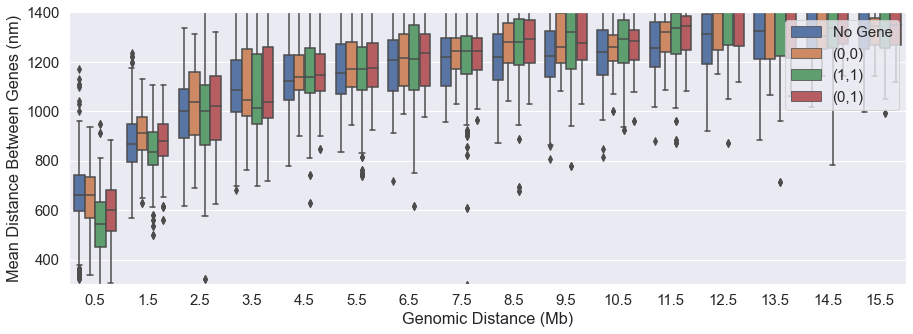

In [10]:
sns.set(font_scale=1.35)
fig=plt.figure()

ax = sns.boxplot(x='Genomic Distance (Mb)', y='Mean Distance Between Genes (nm)', hue="Gene=", data=df2)

plt.legend(loc='upper right',fontsize=15)

plt.xlim(-.5,15.5)
plt.ylim(300,1400)
fig.set_size_inches(15,5)
fig.savefig("Figures/"+"First_Box_Plot_Distance_three.png", dpi=300, bbox_inches='tight')

<h3> Analysis for the relationship on a gene pair by gene pair basis (analysis) </h3>

In [15]:
#Here we are going to do the analysis with the mean distance on a gene pair by gene 

Both_on=np.array([])
Both_off=np.array([])
One_on=np.array([])

data = {'Difference (nm)': [], 'Genomic Distance (Mb)': [],'Gene=': []}
df2= pd.DataFrame.from_dict(data)
for gendis in range(10, 400,20):
    for i in range(651):
        clear_output(wait=True)
        print(gendis,i)
        file = "Gene_Distances"
        df2.to_csv(file,index=False)   
        file='Transcription_Trajectories/Test'+str(i)+'.npy'
        trans=np.load(file)

        if np.nansum(trans)>0:
            file="Distances/Distances_"+str(i)
            df=pd.read_csv(file)

            for ii in range(651): 

                    file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                    trans2=np.load(file)

                    if np.nansum(trans2)>0 and np.abs(i-ii)>gendis-10 and np.abs(i-ii)<gendis+10:


                        temp=trans+trans2
                        inds=temp==2
                        inds2=temp==0
                        inds3=temp==1
                        dis=np.abs(df['barcode'+str(ii)])
                        df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds]), gendis*50/1000, '(0,0)-(1,1)']

                        df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds3]), gendis*50/1000, '(0,0)-(0,1)']




390 650


<h3> Make figure </h3> 

In [ ]:
sns.set(font_scale=1.35)
fig=plt.figure()

ax = sns.boxplot(x='Genomic Distance (Mb)', y='Difference (nm)', hue='Gene=',
                    data=df2)

plt.legend(loc='upper right',fontsize=15)
plt.plot([-10,100],[0,0],'k')

plt.xlim(-.5,19.5)
plt.ylim(-100,200)
fig.set_size_inches(15,5)
fig.savefig("Figures/"+"First_Box_Plot_Distance_both.png", dpi=300, bbox_inches='tight')

<h3> Analysis MPD </h3>

In [11]:
#Now I am going to show how the difference varries with the median distance between the genes

file = "../Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values

Both_on=np.array([])
Both_off=np.array([])
One_on=np.array([])

data = {'Difference (nm)': [], 'MPD (nm)': [],'Gene=': []}
df2= pd.DataFrame.from_dict(data)

for i in range(651):

    file = "Gene_Distances"
    df2.to_csv(file,index=False)   
    
    file='Transcription_Trajectories/Test'+str(i)+'.npy'
    trans=np.load(file)

    if np.nansum(trans)>0:
        file="Distances/Distances_"+str(i)
        df=pd.read_csv(file)

        for ii in range(651): 

                file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                trans2=np.load(file)

                if np.nansum(trans2)>0:
                    for dis2 in range(1, 18,1):
                        #print(dis,i)
                        if Med[i,ii]>dis2*200-100+100 and Med[i,ii]<dis2*200+100+100:
                            clear_output(wait=True)
                            print(dis2,i)


                            temp=trans+trans2
                            inds=temp==2
                            inds2=temp==0
                            inds3=temp==1
                            dis=np.abs(df['barcode'+str(ii)])
                            
                            df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds]), dis2*200+100, '(0,0)-(1,1)']

                            df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds3]), dis2*200+100, '(0,0)-(0,1)']




2 649


<h3> Make Figure </h3>

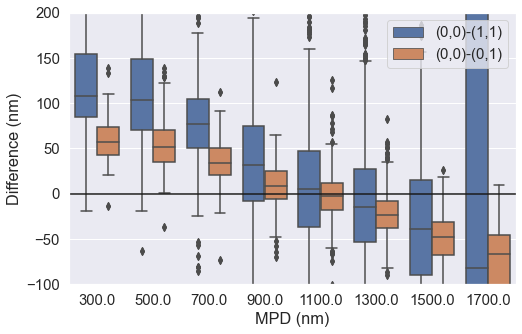

In [14]:
sns.set(font_scale=1.35)
fig=plt.figure()

ax = sns.boxplot(x='MPD (nm)', y='Difference (nm)', hue='Gene=',
                    data=df2)

plt.legend(loc='upper right',fontsize=15)

#Line at zero to aid in the interpretation
plt.plot([-10,100],[0,0],'k')

plt.xlim(-.5,7.5)
plt.ylim(-100,200)
fig.set_size_inches(8,5)
fig.savefig("Figures/"+"First_Box_Plot_Distance_both.png", dpi=300, bbox_inches='tight')

<h2> Quantifying the expected MPD/GD </h2> 

In [ ]:
num_of_loci=651
data_lin_dis = np.zeros((num_of_loci,num_of_loci))

for barcode1 in range(num_of_loci):
    #clear_output(wait=True)
    #print(barcode1/num_of_loci)
    try:
        for barcode2 in range(num_of_loci):
            if barcode2!=barcode1:

                Linear_Dist=np.abs(barcode1-barcode2)

                data_lin_dis[barcode1,barcode2]= Linear_Dist;
    except:
          print ("An error occurred")
            

        
file = "../Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
ff=np.ndarray.flatten(ff.values)

data_lin_dis=np.ndarray.flatten(np.array(data_lin_dis))

     
med=[]            
for i in range(651):
            med.append(np.nanmean(ff[data_lin_dis==i]))

<h2> Taking into account the expected MPD and expected genomic distance </h2> 

<p> We are going to quantify the Median Distance Between Genes - Expected Median ($\mu$m) for when both genes are on and off </p>

In [2]:
num_of_loci=651
data_lin_dis = np.zeros((num_of_loci,num_of_loci))

for barcode1 in range(num_of_loci):
    #clear_output(wait=True)
    #print(barcode1/num_of_loci)
    try:
        for barcode2 in range(num_of_loci):
            if barcode2!=barcode1:

                Linear_Dist=np.abs(barcode1-barcode2)

                data_lin_dis[barcode1,barcode2]= Linear_Dist;
    except:
          print ("An error occurred")
            

        
file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
ff=np.ndarray.flatten(ff.values)

data_lin_dis=np.ndarray.flatten(np.array(data_lin_dis))

     
med=[]            
for i in range(651):
            med.append(np.nanmean(ff[data_lin_dis==i]))
#This is going to be for the correlation between contact frequency and genomic distance
from scipy import stats





file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values


Both_on=np.array([])
Both_off=np.array([])
One_on=np.array([])

data = {'Difference (nm)': [], 'Median Distance Between Genes - Expected Median ($\mu$m)': [],'Gene': []}
df2= pd.DataFrame.from_dict(data)

for i in range(651):

    file = "Gene_Distances"
    df2.to_csv(file,index=False)   
    file='Transcription_Trajectories/Test'+str(i)+'.npy'
    trans=np.load(file)

    if np.nansum(trans)>0:
        file="Distances/Distances_"+str(i)
        df=pd.read_csv(file)

        for ii in range(651): 

                file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                trans2=np.load(file)

                if np.nansum(trans2)>0:
                    #for dis2 in range(1, 18,1):
                        #print(dis,i)
                        #if Med[i,ii]>dis2*200-100 and Med[i,ii]<dis2*200+100:
                            clear_output(wait=True)
                            print(i)


                            temp=trans+trans2
                            inds=temp==2
                            inds2=temp==0
                            inds3=temp==1
                            if np.sum(inds)>40 and np.sum(inds2)>40:
                                dis=np.abs(df['barcode'+str(ii)])
                                df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds3]), np.round((Med[i,ii]-med[np.abs(i-ii)])/100)*.1, 'Both off-Both on (nm)']

                            #df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds3]), np.round((Med[i,ii]-med[np.abs(i-ii)])/100), 'Both off-One on, One off (nm)']



649


<h3> Generate Figure </h3> 

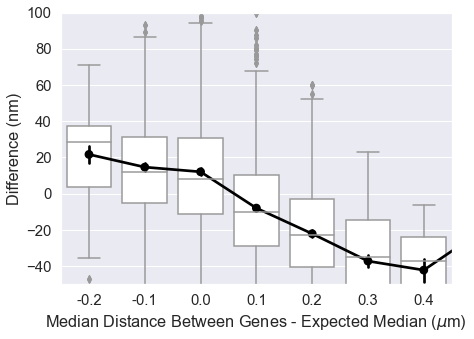

In [4]:
from numpy import mean
df2['Median Distance Between Genes - Expected Median ($\mu$m)']=np.round(df2['Median Distance Between Genes - Expected Median ($\mu$m)'],1)

sns.set(font_scale=1.35)
fig=plt.figure()

ax = sns.boxplot(x='Median Distance Between Genes - Expected Median ($\mu$m)', y='Difference (nm)', 
                    data=df2, color='white')
ax=sns.pointplot( x='Median Distance Between Genes - Expected Median ($\mu$m)', y='Difference (nm)',
                    data=df2, estimator=mean,color='black')

plt.xlim(-.5,6.5)
plt.ylim(-50,100)
fig.set_size_inches(7,5)
fig.savefig("Figures/"+"First_Box_Plot_Distance_both.png", dpi=300, bbox_inches='tight')

<p> We are going to quantify the Median Distance Between Genes - Expected Median ($\mu$m) for when at least one of the genes are on and one is off </p>

In [5]:
num_of_loci=651
data_lin_dis = np.zeros((num_of_loci,num_of_loci))

for barcode1 in range(num_of_loci):
    #clear_output(wait=True)
    #print(barcode1/num_of_loci)
    try:
        for barcode2 in range(num_of_loci):
            if barcode2!=barcode1:

                Linear_Dist=np.abs(barcode1-barcode2)

                data_lin_dis[barcode1,barcode2]= Linear_Dist;
    except:
          print ("An error occurred")
            

        
file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
ff=np.ndarray.flatten(ff.values)

data_lin_dis=np.ndarray.flatten(np.array(data_lin_dis))

     
med=[]            
for i in range(651):
            med.append(np.nanmean(ff[data_lin_dis==i]))
#This is going to be for the correlation between contact frequency and genomic distance
from scipy import stats





file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values


Both_on=np.array([])
Both_off=np.array([])
One_on=np.array([])

data = {'Difference (nm)': [], 'Median Distance Between Genes - Expected Median ($\mu$m)': [],'Gene': []}
df2= pd.DataFrame.from_dict(data)

for i in range(651):

    file = "Gene_Distances"
    df2.to_csv(file,index=False)   
    file='Transcription_Trajectories/Test'+str(i)+'.npy'
    trans=np.load(file)

    if np.nansum(trans)>0:
        file="Distances/Distances_"+str(i)
        df=pd.read_csv(file)

        for ii in range(651): 

                file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                trans2=np.load(file)

                if np.nansum(trans2)>0:
                    #for dis2 in range(1, 18,1):
                        #print(dis,i)
                        #if Med[i,ii]>dis2*200-100 and Med[i,ii]<dis2*200+100:
                            clear_output(wait=True)
                            print(i)


                            temp=trans+trans2
                            inds=temp==2
                            inds2=temp==0
                            inds3=temp==1
                            if np.sum(inds)>40 and np.sum(inds2)>40:
                                dis=np.abs(df['barcode'+str(ii)])
                                df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds]), np.round((Med[i,ii]-med[np.abs(i-ii)])/100)*.1, 'Both off-Both on (nm)']

                            #df2.loc[len(df2.index)] = [np.nanmean(dis[inds2])-np.nanmean(dis[inds3]), np.round((Med[i,ii]-med[np.abs(i-ii)])/100), 'Both off-One on, One off (nm)']



649


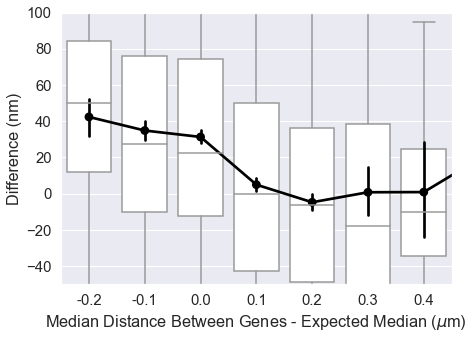

In [6]:
from numpy import mean
df2['Median Distance Between Genes - Expected Median ($\mu$m)']=np.round(df2['Median Distance Between Genes - Expected Median ($\mu$m)'],1)

sns.set(font_scale=1.35)
fig=plt.figure()

ax = sns.boxplot(x='Median Distance Between Genes - Expected Median ($\mu$m)', y='Difference (nm)', 
                    data=df2, color='white')
ax=sns.pointplot( x='Median Distance Between Genes - Expected Median ($\mu$m)', y='Difference (nm)',
                    data=df2, estimator=mean,color='black')

plt.xlim(-.5,6.5)
plt.ylim(-50,100)
fig.set_size_inches(7,5)
fig.savefig("Figures/"+"First_Box_Plot_Distance_both.png", dpi=300, bbox_inches='tight')